# Diabetes Prediction Using Machine Learning

## Objectives
Using the given diabetes dataset, this notebook is to:

- Perform **exploratory data analysis** (EDA)

- Preprocess the dataset for proper training

- Train a **Support Vector Machine** (SVM) and a **Random Forest** model on the preprocessed dataset 

- Compare and evaluate the two trained supervised machine learning models 


# Imports

In [385]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Exploratory Data Analysis and Preprocessing

In [386]:
# Load diabetes data from CSV file
df = pd.read_csv('Datasets\diabetes.csv')

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Admin\AppData\Local\Temp\ipykernel_18384\1328315904.py:2: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('Datasets\diabetes.csv')


## Initial Data Inspection

To understand the structure of the dataset and verify that it has been loaded correctly, we inspect the first and last few rows of the data.


In [387]:
df.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [388]:
df.tail() # bo

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


#### Observation 
- All the data inside the dataset are in neumeric form which make preprocessing less complicated

## Dataset Dimensions and Structure

Examine the number of rows and columns, along with column names and data types, to understand the overall structure of the dataset.


In [389]:
df.shape

(768, 9)

In [390]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Statistical Summary

Descriptive statistics help us understand the distribution of the data across different features with common measures like mean, standard deviation, minimum, and maximum values. 

In [391]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


#### Observation
- Some features such as Glucose, Blood pressure, Skin thickness, Insulin and BMI have minimum values of zero, which seems to be unrealistic for medical measurements.
- The features are on different scales, indicating that scaling
  may be required before model training.


### Replacing invalid data with median value

In [392]:
cols_with_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]


for col in cols_with_zero:
    median_val = df[col].median()
    df[col] = df[col].replace(0, median_val)


In [393]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
Insulin,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Hence, now the dataset doen't seem to have unrealistic Zero values in all features.

## Missing Value Analysis

Check if the dataset consists null values which we can with later deal while doing data preprocessing.


In [394]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Data Visualization

Proper visualizations of data help us identify class imbalances, explore relationships between features, and spot potential outliers in the data.


### 1. Checking class imbalance in dataset

<Axes: xlabel='Outcome', ylabel='count'>

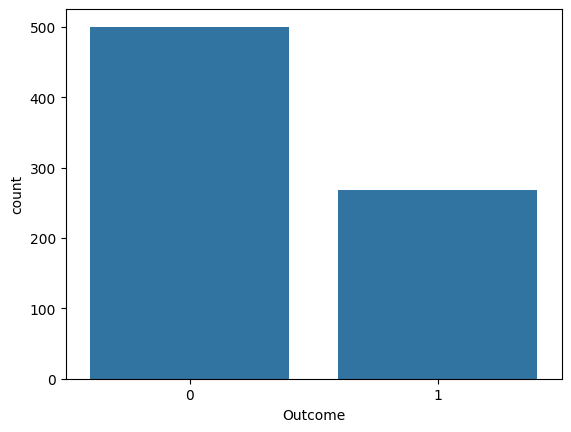

In [395]:
sns.countplot(x="Outcome", data = df)

#### Observation
- The two classes are highly imbalanced. Hence, we will be using class weights during model training to give more importance to the minority class and improve model performance.

### 2. Exploring feature distributions and outliers

In [396]:
# Function for data visualization
def plot_hist_box(df, target_col):
    numeric_cols = df.select_dtypes(include=np.number).columns.drop(target_col)
    n_features = len(numeric_cols)

    plt.figure(figsize=(10, n_features * 3))

    for i, col in enumerate(numeric_cols, 1):

        # Histogram + KDE
        plt.subplot(n_features, 2, 2*i - 1)
        sns.histplot(df[col], kde=True, color='skyblue')
        plt.title(f"Histogram of {col}")
        plt.xlabel(col)

        # Boxplot
        plt.subplot(n_features, 2, 2*i)
        sns.boxplot(x=df[col], color='lightgreen')
        plt.title(f"Boxplot of {col}")
        plt.xlabel(col)

    plt.tight_layout()
    plt.show()

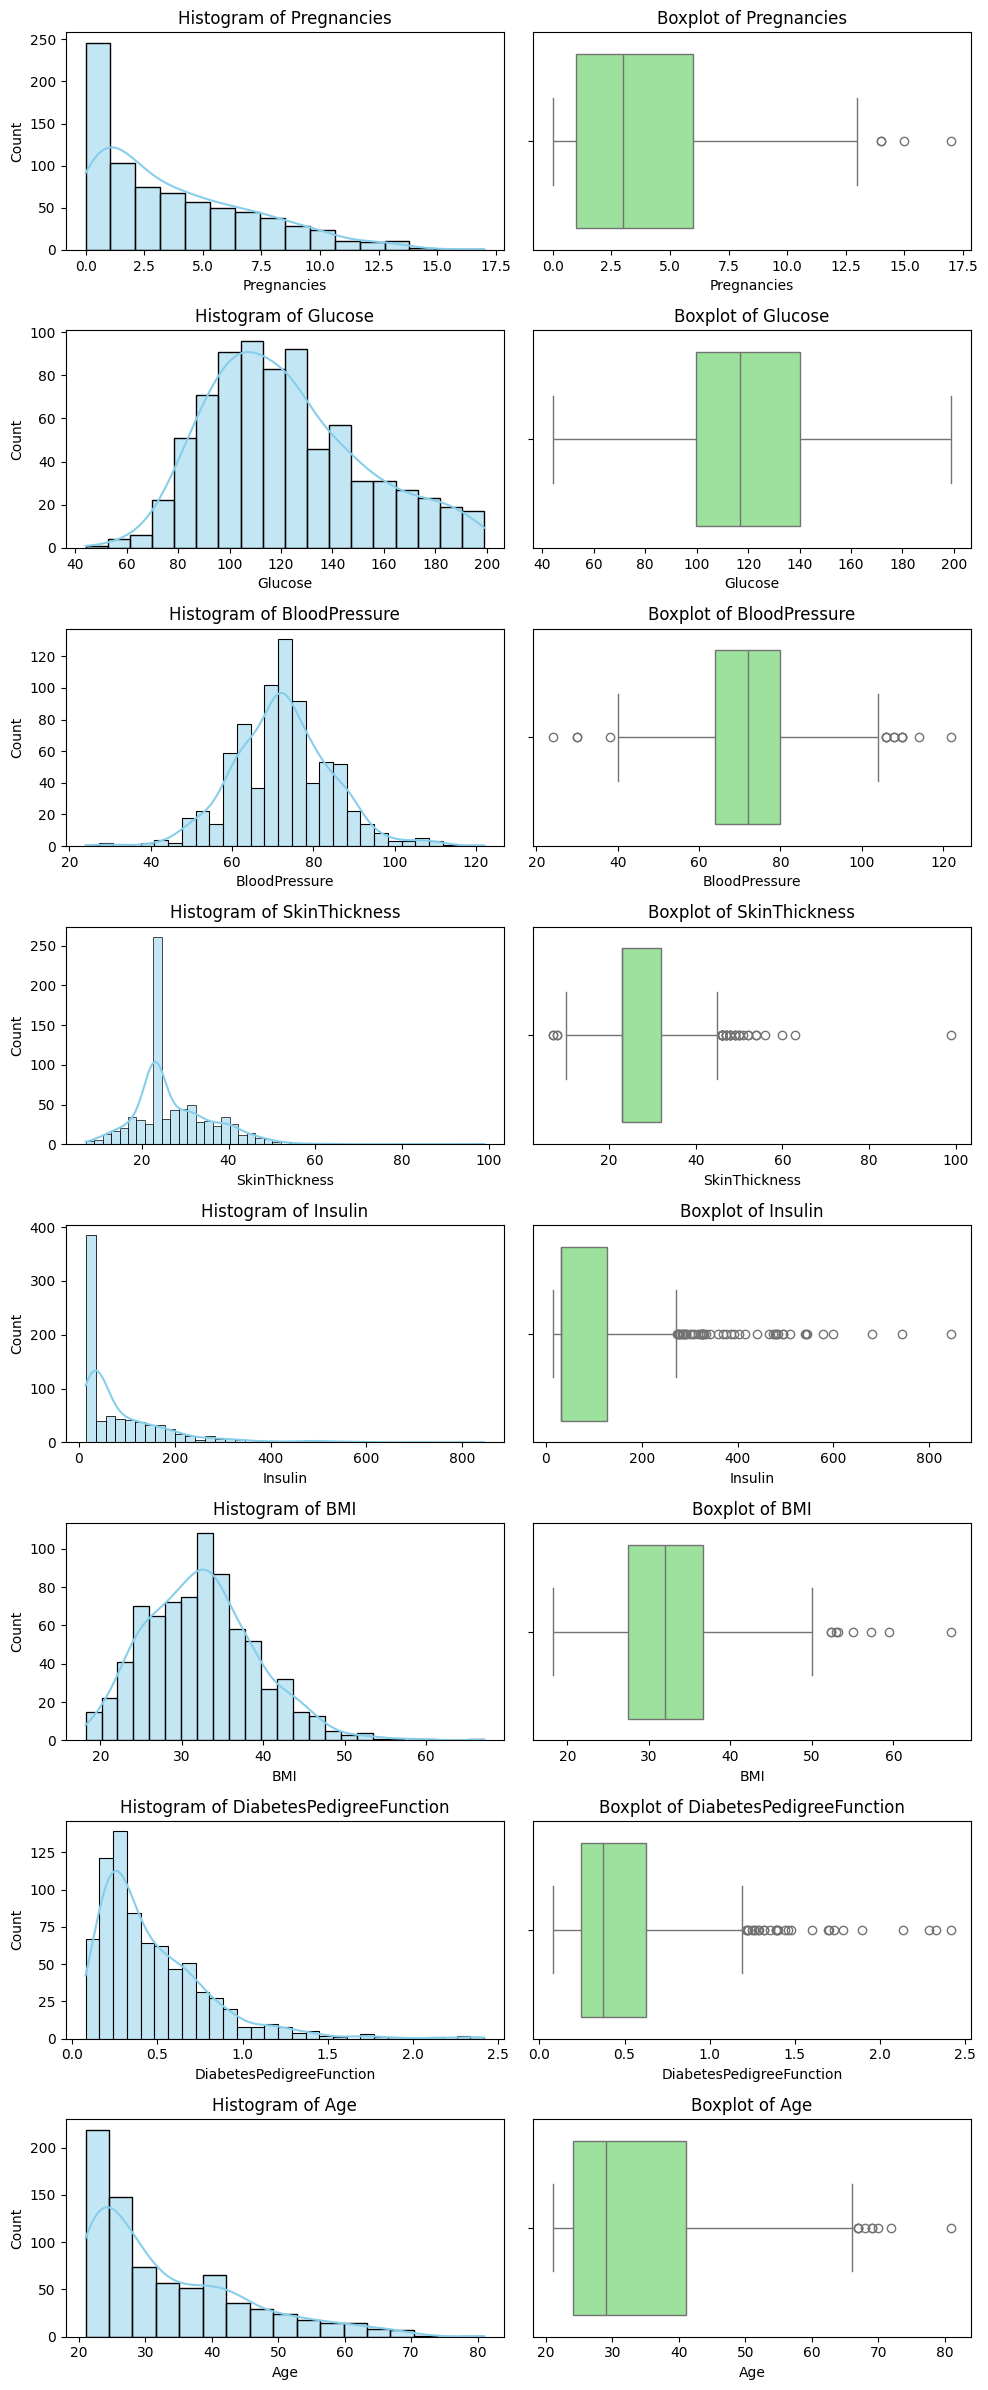

In [397]:
plot_hist_box(df, target_col="Outcome")

#### Alternative Skewness measurement

In [398]:
# for col in df:
#     if col == "Outcome":
#         continue
#     print(col)
#     print(f'skewness: {df[col].astype(float).skew()}')
#     print(f'kurt: {df[col].astype(float).kurt()}')

#### Observation
- All the features except Blood pressure are moderately or highly skewed.

Highly skewed features can be transformed to improve model performance.


### Handling extreme outliers outside of medical fields

In [399]:
# Example: replace values above Q3 + 1.5*IQR with median
# numeric_cols = df.select_dtypes(include=np.number).columns.drop("Outcome")
# for col in numeric_cols:
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     upper_limit = Q3 + 1.5*IQR
#     df.loc[df[col] > upper_limit, col] = df[col].median()


### Transforming Moderately to Highly Skewed Features
- **Right-skewed features** (long tail to the right) are reduced using **log** or **square root** transformations
- **Left-skewed features** (long tail to the left) can be transformed using **reverse square root** (`sqrt(max - x)`)


In [400]:
skewed_cols = [
    "Pregnancies",
    "Glucose",
    "SkinThickness",
    "Insulin",
    "BMI",
    "DiabetesPedigreeFunction",
    "Age"
]

for col in skewed_cols:
    skewness = df[col].skew()

    if skewness > 0: # right-skewed
        df[col] = np.log1p(df[col])
    elif skewness < 0: # left-skewed
        df[col] = np.sqrt(df[col].max() - df[col])


### Outcome:

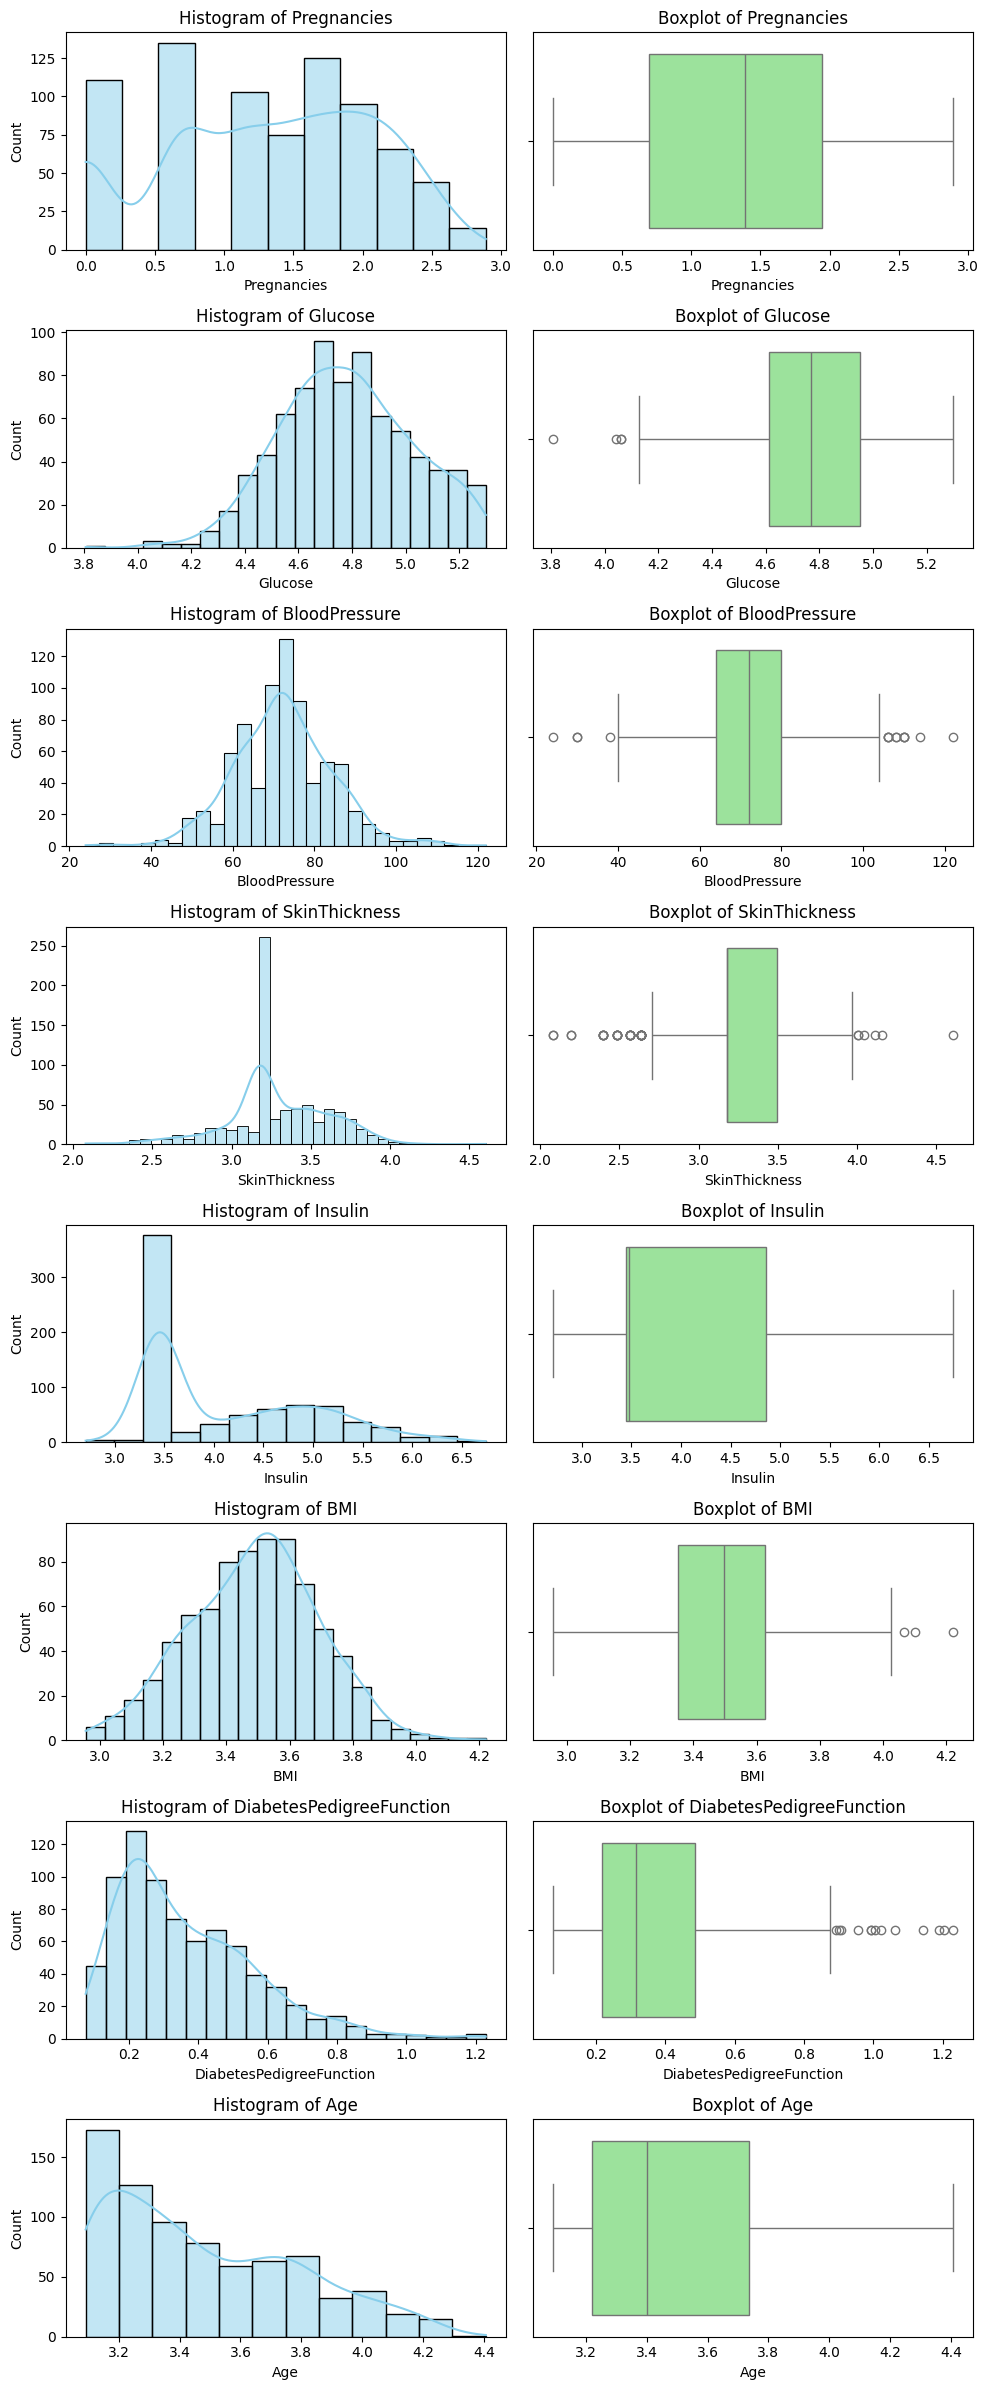

In [401]:
plot_hist_box(df, target_col="Outcome")

#### Alternative Skewness measurement

In [402]:
# for col in df:
#     if col == "Outcome":
#         continue
#     print(col)
#     print(f'skewness: {df[col].astype(float).skew()}')
#     print(f'kurt: {df[col].astype(float).kurt()}')

### 3. Feature Correlation

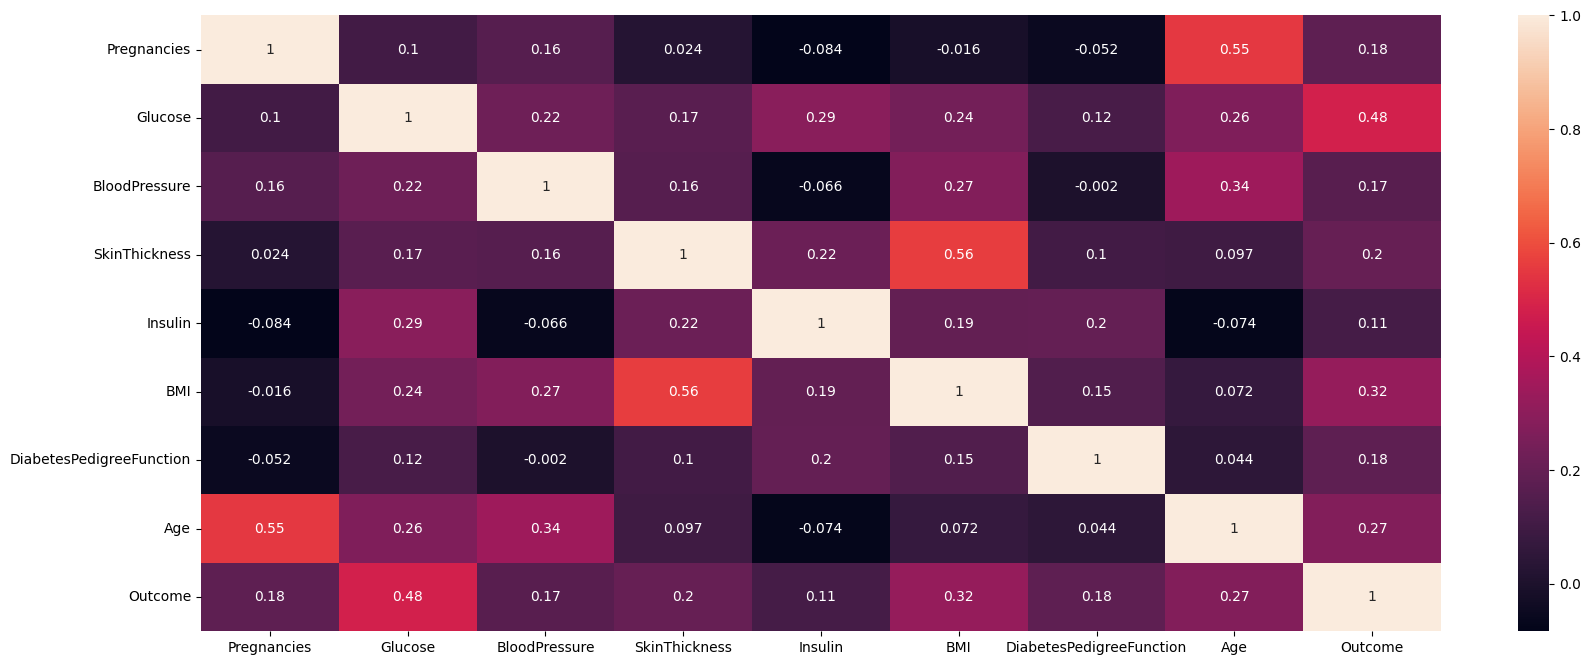

In [403]:
plt.figure(figsize=(20, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()

#### Observation
- Glucose shows a strong positive correlation with Outcome.  
- Features with weak correlation may contribute less to prediction.


# Data Splitting

The dataset is split into **75% training** and **25% testing** sets, using a consistent `random_state=42`.  
We also **stratify by the target variable `y`** to ensure the class distribution is balanced in both training and testing sets.


In [404]:
X = df.drop(columns='Outcome')
y = df['Outcome']
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=42, stratify=y)

print(f"X:\n{X[:5]}\n")
print(f"y:\n{y[:5]}\n")
print("Original:",X.shape,y.shape)
print("Training split:",X_train.shape, X_test.shape)
print("Testing split:",y_train.shape, y_test.shape)

X:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     1.945910  5.003946             72       3.583519  3.449988  3.543854   
1     0.693147  4.454347             66       3.401197  3.449988  3.317816   
2     2.197225  5.214936             64       3.178054  3.449988  3.190476   
3     0.693147  4.499810             66       3.178054  4.553877  3.370738   
4     0.000000  4.927254             40       3.583519  5.129899  3.786460   

   DiabetesPedigreeFunction       Age  
0                  0.486738  3.931826  
1                  0.300845  3.465736  
2                  0.514021  3.496508  
3                  0.154436  3.091042  
4                  1.190279  3.526361  

y:
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

Original: (768, 8) (768,)
Training split: (576, 8) (192, 8)
Testing split: (576,) (192,)


---

# Model Training

## SVM Model Training

### 1. Hyperparameter Tuning for SVM 

Hyperparameter tuning for the Support Vector Machine (SVM) classifier was conducted using **5-fold cross-validation** on the training dataset to identify the optimal model configuration. The tuning process aimed to maximize the **ROC–AUC score**, which is well-suited for imbalanced classification problems.

The following hyperparameters were explored:

- **`C` (regularization parameter)**: [0.1, 1, 10]  
- **`gamma` (kernel coefficient)**: ['scale', 0.01, 0.1, 1]  

An **RBF kernel** was used, and **class weights of {0: 1, 1: 3}** were applied to emphasize the minority class. Feature scaling was incorporated using a **StandardScaler** within a pipeline to ensure proper normalization during cross-validation.

For each combination of hyperparameters, the mean ROC–AUC score across the five folds was computed. The combination achieving the **highest average ROC–AUC score** was selected as the optimal configuration. These best-performing hyperparameters were then used to train the final SVM model on the full training dataset prior to evaluation on the test set.



In [405]:
C_values = [0.1, 1, 10]
gamma_values = ['scale', 0.01, 0.1, 1]


best_score_svm = 0
best_params_svm = {}

for C in C_values:
    for gamma in gamma_values:
        svm_model = SVC(
            kernel='rbf',
            C=C,
            gamma=gamma,
            class_weight={0:1, 1:3},
            probability=True,
            random_state=42
        )

        svm_pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('svm', svm_model)
        ])

        scores = cross_val_score(
            svm_pipe,
            X_train,
            y_train,
            cv=5,
            scoring='roc_auc'   
        )

        mean_score = scores.mean()
        print(f"C={C}, gamma={gamma}, Average accuracy={mean_score:.4f}")

        if mean_score > best_score_svm:
            best_score_svm = mean_score
            best_params_svm = {'C': C, 'gamma': gamma}

print("Best parameters:", best_params_svm)
print("Best CV accuracy:", best_score_svm)


C=0.1, gamma=scale, Average accuracy=0.8192
C=0.1, gamma=0.01, Average accuracy=0.8293
C=0.1, gamma=0.1, Average accuracy=0.8221
C=0.1, gamma=1, Average accuracy=0.7610
C=1, gamma=scale, Average accuracy=0.8186
C=1, gamma=0.01, Average accuracy=0.8310
C=1, gamma=0.1, Average accuracy=0.8202
C=1, gamma=1, Average accuracy=0.7332
C=10, gamma=scale, Average accuracy=0.7814
C=10, gamma=0.01, Average accuracy=0.8311
C=10, gamma=0.1, Average accuracy=0.7953
C=10, gamma=1, Average accuracy=0.7106
Best parameters: {'C': 10, 'gamma': 0.01}
Best CV accuracy: 0.8310536585365853


## 2. Training the Final SVM Model with Optimal Hyperparameters

Based on the results obtained from **cross-validation during hyperparameter tuning**, we train the final SVM model using the **best-performing values of `C` and `gamma`**.

- The **RBF kernel** is used as it showed the strongest performance during kernel comparison.  
- The selected values of `C` and `gamma` maximize the cross-validated **ROC AUC score**, indicating better generalization.  
- **Class weights `{0:1, 1:3}`** are retained to address class imbalance and improve recall for the diabetic class.  
- A **StandardScaler** is included in a pipeline to ensure consistent feature scaling and prevent data leakage.

The model is fitted on the training data and is then evaluated on the test set to assess its performance on unseen samples.


In [406]:
svm_model = SVC(kernel='rbf',class_weight={0: 1, 1: 3}, C=best_params_svm['C'], gamma=best_params_svm['gamma'], random_state=42, probability=True)

svm_pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('svm', svm_model)
    ])
svm_pipe.fit(X_train, y_train)  # apply the pipeline on training data

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm',
                 SVC(C=10, class_weight={0: 1, 1: 3}, gamma=0.01,
                     probability=True, random_state=42))])

## 3. SVM Model Evaluation

The trained SVM model is evaluated using multiple metrics on both the **training** and **testing** datasets to assess performance and generalization.

- **Classification reports** are generated for both the training and testing sets, providing precision, recall, F1-score, and support for each class. This enables comparison between seen and unseen data and helps identify potential overfitting.
- A **confusion matrix** is presented for the test set to visualize true positives, true negatives, false positives, and false negatives.
- **Training and testing accuracy** are computed and visualized using a bar chart, allowing direct comparison of model performance across datasets.

This comprehensive evaluation goes beyond overall accuracy by highlighting generalization behavior and the model’s effectiveness in predicting the **minority class**, which is particularly important in the presence of class imbalance.


### I. Training Evaluation

In [407]:
y_pred_train_svm =svm_pipe.predict(X_train)
print(classification_report(y_train, y_pred_train_svm))


              precision    recall  f1-score   support

           0       0.94      0.65      0.76       375
           1       0.58      0.92      0.71       201

    accuracy                           0.74       576
   macro avg       0.76      0.78      0.74       576
weighted avg       0.81      0.74      0.75       576



### II. Testing Evaluation

In [408]:
y_pred_svm = svm_pipe.predict(X_test)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.90      0.67      0.77       125
           1       0.59      0.87      0.70        67

    accuracy                           0.74       192
   macro avg       0.74      0.77      0.73       192
weighted avg       0.79      0.74      0.75       192



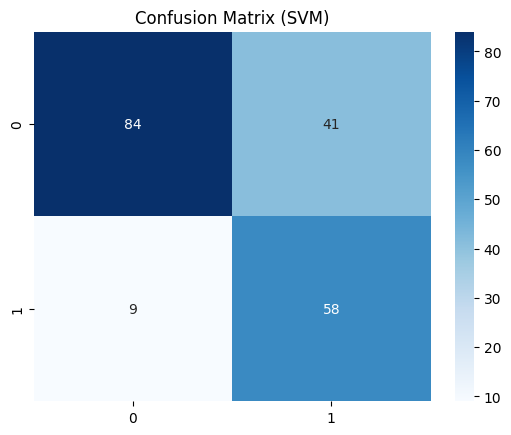

In [409]:
sns.heatmap(confusion_matrix(y_test, y_pred_svm),annot=True,cmap="Blues")
plt.title("Confusion Matrix (SVM)")
plt.show()

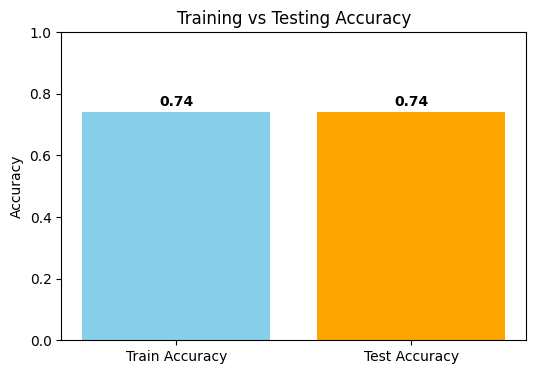

In [410]:
train_acc = accuracy_score(y_train, y_pred_train_svm)
test_acc = accuracy_score(y_test, y_pred_svm)

accuracies = [train_acc, test_acc]
labels = ['Train Accuracy', 'Test Accuracy']

plt.figure(figsize=(6,4))
plt.bar(labels, accuracies, color=['skyblue', 'orange'])
plt.ylim(0, 1) 
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy')
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()


#### Observations

- The SVM model achieves an accuracy of 74% on both the training and testing datasets, as shown by the accuracy comparison bar graph. This indicates that the model **does not exhibit overfitting**, as performance remains consistent on unseen data.
- For **Class 0 (majority class)**, the model shows **high precision** (0.94 train, 0.90 test) but **moderate recall** (0.65 train, 0.67 test), suggesting that while predictions for this class are generally correct, some instances are misclassified as the minority class.
- For **Class 1 (minority class)**, the model demonstrates **high recall** (0.92 train, 0.87 test) but **lower precision** (0.58 train, 0.59 test). This indicates that the model is effective at identifying most minority class instances, although it produces a higher number of false positives.
- The **F1-scores** for both classes remain stable across training and testing datasets, indicating consistent model behavior and good generalization.
- The **macro-averaged recall** is relatively balanced (0.78 train, 0.77 test), suggesting that the model treats both classes reasonably well despite the presence of class imbalance.

Overall, the SVM model demonstrates **stable generalization performance** and shows a strong ability to detect the **minority class**, making it suitable for applications where minimizing false negatives is important.


---

## Random Forest Model Training

### 1. Random Forest Hyperparameter Tuning

Hyperparameter tuning for the Random Forest classifier was performed using **5-fold cross-validation** on the training dataset to identify the optimal model configuration. The goal was to maximize the **ROC–AUC score**, which is particularly suitable for imbalanced classification problems.

The following hyperparameters were explored:

- **`max_depth`**: [5, 10, 15]  
- **`min_samples_split`**: [10, 20]  
- **`min_samples_leaf`**: [5, 10, 12]  
- **`max_features`**: ['sqrt', 'log2']  

To address class imbalance, a **class weight of {0: 1, 1: 3}** was applied, giving higher importance to the minority class. For each hyperparameter combination, the mean ROC–AUC score across the five folds was computed.

The combination yielding the **highest average ROC–AUC score** was selected as the optimal set of hyperparameters. These best parameters were then used to train the final Random Forest model on the full training dataset before evaluation on the test set.


In [411]:
max_depth_values = [5, 10, 15]
min_samples_split_values = [10, 20]
min_samples_leaf_values = [5, 10, 12]
max_features_values = ['sqrt', 'log2']  

best_score_rf = 0
best_params_rf = {}

for depth in max_depth_values:
    for split in min_samples_split_values:
        for leaf in min_samples_leaf_values:
            for mf in max_features_values:

                rf_model = RandomForestClassifier(
                    class_weight={0: 1, 1: 3},
                    max_depth=depth,
                    min_samples_split=split,
                    min_samples_leaf=leaf,
                    max_features=mf,
                    random_state=42,
                )

                scores = cross_val_score(
                    rf_model,
                    X_train,
                    y_train,
                    cv=5,
                    scoring='roc_auc' 
                )

                mean_score = scores.mean()
                print(
                    f"depth={depth}, split={split}, leaf={leaf}, "
                    f"max_features={mf}, CV score={mean_score:.4f}"
                )

                if mean_score > best_score_rf:
                    best_score_rf = mean_score
                    best_params_rf = {
                        'max_depth': depth,
                        'min_samples_split': split,
                        'min_samples_leaf': leaf,
                        'max_features': mf
                    }

print("Best parameters:", best_params_rf)
print("Best CV score:", best_score_rf)


depth=5, split=10, leaf=5, max_features=sqrt, CV score=0.8247
depth=5, split=10, leaf=5, max_features=log2, CV score=0.8249
depth=5, split=10, leaf=10, max_features=sqrt, CV score=0.8219
depth=5, split=10, leaf=10, max_features=log2, CV score=0.8277
depth=5, split=10, leaf=12, max_features=sqrt, CV score=0.8226
depth=5, split=10, leaf=12, max_features=log2, CV score=0.8281
depth=5, split=20, leaf=5, max_features=sqrt, CV score=0.8250
depth=5, split=20, leaf=5, max_features=log2, CV score=0.8276
depth=5, split=20, leaf=10, max_features=sqrt, CV score=0.8219
depth=5, split=20, leaf=10, max_features=log2, CV score=0.8277
depth=5, split=20, leaf=12, max_features=sqrt, CV score=0.8226
depth=5, split=20, leaf=12, max_features=log2, CV score=0.8281
depth=10, split=10, leaf=5, max_features=sqrt, CV score=0.8205
depth=10, split=10, leaf=5, max_features=log2, CV score=0.8232
depth=10, split=10, leaf=10, max_features=sqrt, CV score=0.8199
depth=10, split=10, leaf=10, max_features=log2, CV score=0

###  2. Random Forest Final Model Training

After identifying the optimal hyperparameters through cross-validation, the Random Forest classifier was **retrained on the full training dataset** using the selected best-performing configuration.

The final model was initialized with:

- **Optimal hyperparameters** obtained from cross-validation  
- **Class weights of {0: 1, 1: 3}** to address class imbalance  
- A fixed **random state** to ensure reproducibility  

Training the model on the complete training set allows it to fully learn from all available data while maintaining the optimized balance between bias and variance. This final trained model was then used for evaluation on the test dataset.


In [412]:
rf_model = RandomForestClassifier(
    class_weight={0: 1, 1: 3},  
    max_depth=best_params_rf['max_depth'],
    min_samples_leaf=best_params_rf['min_samples_leaf'],
    min_samples_split=best_params_rf['min_samples_split'],
    max_features=best_params_rf['max_features'],
    random_state=42,
)

rf_model.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 3}, max_depth=5,
                       max_features='log2', min_samples_leaf=12,
                       min_samples_split=10, random_state=42)

## 3. Random Forest Model Evaluation

Similar to the evaluation of the SVM model, the Random Forest model is evaluated on both the training and test sets using:

- **Confusion Matrix**: Shows the number of true positives, true negatives, false positives, and false negatives, helping us understand how well the model classifies each class.  
- **Classification Report**: Provides precision, recall, F1-score, and support for each class, giving a detailed view of model performance, especially for the **minority class**.  

This evaluation allows us to compare the Random Forest model with the SVM model and assess its ability to handle class imbalance.


### I. Training Evaluation

In [413]:
y_pred_train_rf = rf_model.predict(X_train)
print(classification_report(y_train, y_pred_train_rf))


              precision    recall  f1-score   support

           0       0.93      0.73      0.82       375
           1       0.64      0.90      0.75       201

    accuracy                           0.79       576
   macro avg       0.79      0.81      0.78       576
weighted avg       0.83      0.79      0.79       576



### II. Testing Evaluation

In [414]:
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.91      0.69      0.78       125
           1       0.60      0.87      0.71        67

    accuracy                           0.75       192
   macro avg       0.75      0.78      0.74       192
weighted avg       0.80      0.75      0.76       192



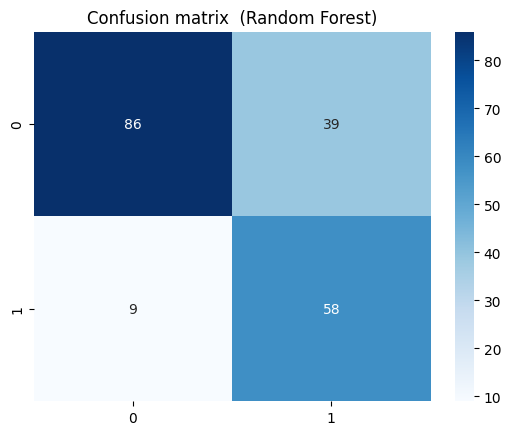

In [415]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf),annot=True,cmap="Blues")
plt.title("Confusion matrix  (Random Forest)")
plt.show()

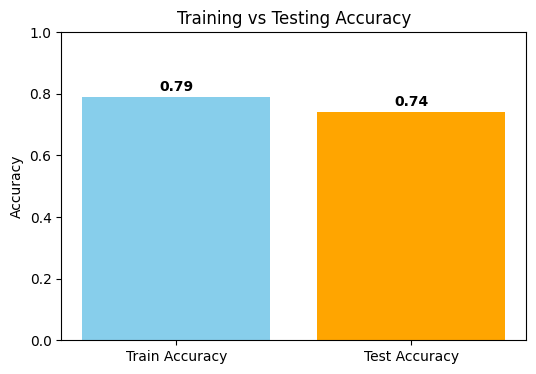

In [416]:
# Calculate accuracy
train_acc = accuracy_score(y_train, y_pred_train_rf)
test_acc = accuracy_score(y_test, y_pred_svm)

# Prepare data
accuracies = [train_acc, test_acc]
labels = ['Train Accuracy', 'Test Accuracy']

# Plot bar graph
plt.figure(figsize=(6,4))
plt.bar(labels, accuracies, color=['skyblue', 'orange'])
plt.ylim(0, 1)  # accuracy ranges from 0 to 1
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy')
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()


#### Observations

- The Random Forest model achieves an accuracy of **79% on the training set** and **74% on the testing set**, as shown by the accuracy comparison bar graph. This indicates **slight overfitting**, as training performance is higher than on unseen data.  
- For **Class 0 (majority class)**, the model shows **high precision** (0.93 train, 0.91 test) but **moderate recall** (0.73 train, 0.69 test), suggesting that most predictions for this class are correct, with some misclassifications.  
- For **Class 1 (minority class)**, the model demonstrates **high recall** (0.90 train, 0.87 test) but **lower precision** (0.64 train, 0.60 test). This indicates the model identifies most minority class instances, though it produces more false positives.  
- The **F1-scores** for both classes remain fairly consistent across training and testing datasets, indicating stable model behavior.  
- The **macro-averaged recall** is reasonably balanced (0.81 train, 0.78 test), showing that the model handles class imbalance effectively.  

Overall, the Random Forest model demonstrates **good generalization** and a strong ability to detect the **minority class**, making it suitable for applications where capturing positive cases is important.


---

# Comparing SVM and Random Forest

=== SVM Classification Report (Test) ===
              precision    recall  f1-score   support

           0       0.90      0.67      0.77       125
           1       0.59      0.87      0.70        67

    accuracy                           0.74       192
   macro avg       0.74      0.77      0.73       192
weighted avg       0.79      0.74      0.75       192

=== Random Forest Classification Report (Test) ===
              precision    recall  f1-score   support

           0       0.91      0.69      0.78       125
           1       0.60      0.87      0.71        67

    accuracy                           0.75       192
   macro avg       0.75      0.78      0.74       192
weighted avg       0.80      0.75      0.76       192



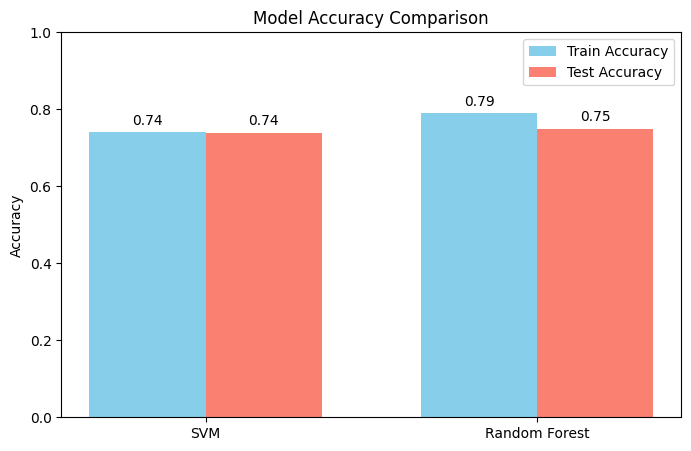

In [420]:
# Compute accuracy
acc_train_svm = accuracy_score(y_train, y_pred_train_svm)
acc_test_svm = accuracy_score(y_test, y_pred_svm)

acc_train_rf = accuracy_score(y_train, y_pred_train_rf)
acc_test_rf = accuracy_score(y_test, y_pred_rf)

print("=== SVM Classification Report (Test) ===")
print(classification_report(y_test, y_pred_svm))

print("=== Random Forest Classification Report (Test) ===")
print(classification_report(y_test, y_pred_rf))

# Plotting training vs testing accuracy
models = ['SVM', 'Random Forest']
train_acc = [acc_train_svm, acc_train_rf]
test_acc = [acc_test_svm, acc_test_rf]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(8,5))
rects1 = ax.bar(x - width/2, train_acc, width, label='Train Accuracy', color='skyblue')
rects2 = ax.bar(x + width/2, test_acc, width, label='Test Accuracy', color='salmon')

ax.set_ylabel('Accuracy')
ax.set_ylim(0,1)
ax.set_title('Model Accuracy Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Add labels on bars
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0,3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()


#### Observations: SVM vs Random Forest

- **Test Accuracy**: SVM = 74%, Random Forest = 75%, indicating that both models perform similarly on unseen data.  
- **Class 0 (majority class)**: Both models have **high precision** (SVM 0.90, RF 0.91) but **moderate recall** (SVM 0.67, RF 0.69), meaning most predictions are correct, but some majority instances are misclassified.  
- **Class 1 (minority class)**: Both models show **high recall** (SVM 0.87, RF 0.87) but lower precision (SVM 0.59, RF 0.60), indicating effective identification of positive cases with some false positives.  
- **F1-scores and macro averages** are comparable, suggesting **balanced performance** and good handling of class imbalance.  
- Overall, **Random Forest slightly outperforms SVM** in test accuracy, but both models generalize well and capture the minority class effectively.


## ROC Curve and AUC Calculation

To evaluate the **discriminative ability** of our models, we calculate the **ROC curve** and **AUC (Area Under the Curve)** for both the SVM and Random Forest classifiers:  

- `predict_proba` is used to obtain the **predicted probabilities** for the positive class.  
- The **ROC curve** plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various thresholds.  
- **AUC** summarizes the overall ability of the model to distinguish between classes:  
  - AUC = 1 → perfect classifier  
  - AUC = 0.5 → random guessing  

This evaluation provides a **threshold-independent measure** of model performance, especially useful for **imbalanced datasets**.


In [418]:
y_score = svm_pipe.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_score)
roc_auc_svm = auc(fpr_svm, tpr_svm)

y_score = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_score)
roc_auc_rf = auc(fpr_rf, tpr_rf)

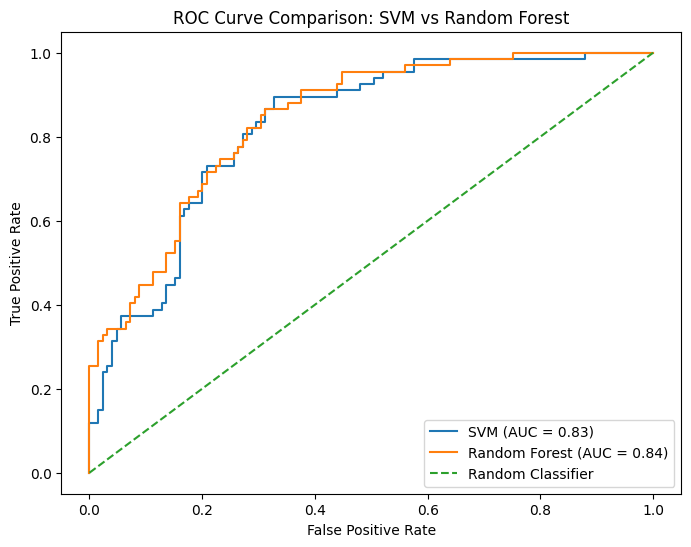

In [419]:
plt.figure(figsize=(8, 6))

# SVM ROC
plt.plot(
    fpr_svm,
    tpr_svm,
    label=f"SVM (AUC = {roc_auc_svm:.2f})"
)

# Random Forest ROC
plt.plot(
    fpr_rf,
    tpr_rf,
    label=f"Random Forest (AUC = {roc_auc_rf:.2f})"
)

# Random classifier baseline
plt.plot([0, 1], [0, 1], linestyle='--', label="Random Classifier")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison: SVM vs Random Forest")
plt.legend(loc="lower right")
plt.show()


#### ROC-AUC Comparison: SVM vs Random Forest

- The **ROC-AUC score** provides a measure of the models' ability to distinguish between the two classes, independent of class distribution.  
- **SVM** achieves an ROC-AUC of **0.83**, while **Random Forest** achieves **0.84** on the test set.  
- Both models perform well in separating the positive and negative classes, with Random Forest showing a **slightly better discriminative ability**.  
- The small difference indicates that while Random Forest has a marginally higher overall accuracy, both models are comparable in terms of class separation and handling of class imbalance.


## Conclusion

Based on the analysis and evaluation of the SVM and Random Forest models:

- **Accuracy**: Both models perform similarly, with SVM achieving 74% and Random Forest 75% on the test set. Training vs testing accuracy shows that SVM generalizes well without overfitting, while Random Forest shows only slight overfitting.  
- **Class-wise performance**: For the majority class (Class 0), both models have high precision but moderate recall, indicating most predictions are correct with some misclassifications. For the minority class (Class 1), both models achieve high recall but lower precision, showing they effectively identify positive cases while generating some false positives.  
- **F1-scores and macro averages**: Both models have stable F1-scores and balanced macro averages, demonstrating consistent performance across classes and good handling of class imbalance.  
- **ROC-AUC**: SVM achieved 0.83 and Random Forest 0.84, indicating both models can discriminate between classes effectively, with Random Forest showing a slight advantage.  
- **Overall comparison**: Random Forest slightly outperforms SVM in terms of overall accuracy and ROC-AUC, but both models show strong gene
